In [2]:
from sympy import *
from fractions import Fraction
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import hypergeom
from scipy.stats import expon
import math
import statsmodels.api as sm
from scipy import stats
import numpy as np
import sympy as sp
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from IPython.display import display, Latex, HTML, Math
%matplotlib inline

In [3]:
# a)
# Integrate f
x, y, z, u, c = symbols('x y z u c')
func = c*(1-u**(2))  # change func
display(Math(r'F(x) = '+ latex(sp.integrate(func,(u, -1, 1)))))

<IPython.core.display.Math object>

In [8]:
list = solve(sp.integrate(func,(u, -1, 1)) -1, c)
print("c =", list[0])

c = 3/4


In [13]:
f = list[0]*(1-u**(2))
cdf = integrate(f, (u,-1, x))
display(Math(r'F(x) = '+ latex(cdf)))

<IPython.core.display.Math object>

In [15]:
# b)

def F(x):
    y = integrate(f, (u,-1, x))
    return y
print("P(X \u2264 1/2) =", round(F(1/2), 4))
print("P(X \u2264 -1/4) =", round(F(-1/4), 4))

P(X ≤ 1/2) = 0.8438
P(X ≤ -1/4) = 0.3164


In [16]:
# c)
Ex = integrate(u*f, (u,-1,1))
Var = integrate(u**2*f, (u,-1,1))-Ex**2
print("E(x) =", Ex)
print("Var(x) =", Var)

E(x) = 0
Var(x) = 1/5


Assignment 2
==

In [8]:
# a) Poisson
l = 3.5
k = 2
print("P(X \u2265 2) =", round(poisson.sf(k-1,l), 3))

P(X ≥ 2) = 0.864


In [9]:
# b) Hypergeometric
[M, n, N] = [100, 6, 10]
k = 2
print("P(X > 2) =", round(hypergeom.sf(k, M, n, N), 3))

P(X > 2) = 0.013


In [11]:
# c) Binomial
prob = binom.sf(0,10,0.01)

print("P(X = 1) = ", round(binom.pmf(1, 3, prob), 8))
print("P(X \u2265 1) = ", round(binom.sf(0, 3, prob), 8))

P(X = 1) =  0.23461969
P(X ≥ 1) =  0.26029963


Assignment 3
==

In [12]:
rate = 1/8
x = 8
print('P(X > 8) =', round(expon.sf(x, 0, 1/rate), 4))

P(X > 8) = 0.3679


Assignment 4
==

In [13]:
# a)

df = pd.DataFrame({'Rural':[57, 50, 42, 149], 'Suburban':[87, 42, 22, 151], 'Urban':[103,49, 26, 178],
                   'Total attitude':[247,141,90, 478]})
df = df.rename({0: 'Grades', 1:'Learning', 2: 'Social', 3:'Total area'})
df2 = df/478
display(df)
display(round(df2, 3))

,Rural,Suburban,Urban,Total attitude
Grades,57,87,103,247
Learning,50,42,49,141
Social,42,22,26,90
Total area,149,151,178,478


,Rural,Suburban,Urban,Total attitude
Grades,0.119,0.182,0.215,0.517
Learning,0.105,0.088,0.103,0.295
Social,0.088,0.046,0.054,0.188
Total area,0.312,0.316,0.372,1.000


In [14]:
# b-d
print("b. P(Suburban and social) =", round(df2.loc["Social", "Suburban"], 3))
print("c. P(Social given suburban) =", round(df2.loc["Social", "Suburban"]/df2.loc["Social", "Total attitude"], 3))
print("d. P(Suburban given social) =", round(df2.loc["Social", "Suburban"]/df2.loc["Total area", "Suburban"], 3))

b. P(Suburban and social) = 0.046
c. P(Social given suburban) = 0.244
d. P(Suburban given social) = 0.146


In [15]:
# e)

pgrade = 247/478
# p1 = grade given rural
# p2 = grade given suburban
# p3 = grade given urban
p1 = 57/149
p2 = 87/151
p3 = 103/178

if pgrade == p1:
    print("'Rural' and 'Grades' are independent")
else:
    print("'Rural' and 'Grades' are dependent")
    
if pgrade == p2:
    print("'Suburban' and 'Grades' are independent")
else:
    print("'Suburban' and 'Grades' are dependent")

if pgrade == p3:
    print("'Urban' and 'Grades' are independent")
else:
    print("'Urban' and 'Grades' are dependent")

'Rural' and 'Grades' are dependent
'Suburban' and 'Grades' are dependent
'Urban' and 'Grades' are dependent


In [16]:
# f)

alpha = 0.05
obs = np.array([
    [57, 87, 103],
    [50, 42, 49],
    [42, 22, 26],
])
stat, pvalue, dof, ex = stats.chi2_contingency(obs, correction=True)

if pvalue < alpha:
    print("Reject since p-value = " + repr(round(pvalue, 4)) + ' < ' + repr(alpha))
else:
    print("Fail to reject since p-value = " + repr(round(pvalue, 4)) + ' > ' + repr(alpha))
print(obs)
print('--------')
print (ex.astype(int))

Reject since p-value = 0.0008 < 0.05
[[ 57  87 103]
 [ 50  42  49]
 [ 42  22  26]]
--------
[[76 78 91]
 [43 44 52]
 [28 28 33]]


In [ ]:
# g)

# We would need to state alpha as low as 0.0008. This is the probability of obtaining the observed values given that
# the null hypothesis is truen, i.e. given that living area and attitude towards importance in school are independent.

Assignment 5
==

In [19]:
df = pd.read_excel(
    'C:/Users/RIB/OneDrive - ViaUC/Arbejde/Stochastic modeling and processes/Previous Exams/Crime Study.xlsx'
)
df.head()

,Crime Before,Crime After,Murder Before,Murder After,Rape Before,Rape After,Robery Before,Robery After
0,3860,3527,2.1,1.7,13.400000,13.400000,30,26
1,3829,3138,2.2,1.0,16.200001,20.700001,34,23
2,4692,3968,2.3,2.3,34.900002,19.799999,23,23
3,5504,4588,3.8,3.6,25.299999,28.100000,214,175
4,5364,4774,3.7,3.4,19.400000,21.299999,115,113


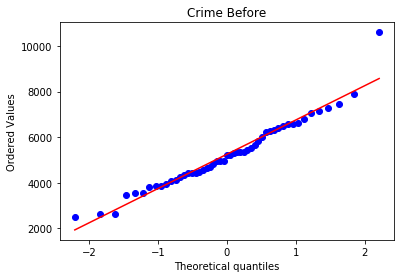

In [20]:
stats.probplot(df['Crime Before'], plot=plt)
plt.title('Crime Before');

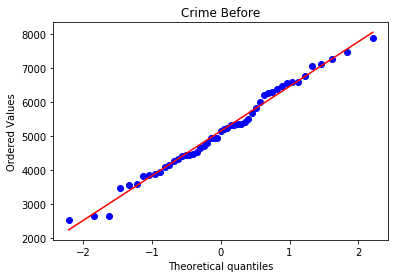

In [21]:
q3, q1 = np.percentile(df['Crime Before'], [75,25])
iqr = q3 - q1
outlier = q3+1.5*iqr
outlier
average = df.loc[df['Crime Before'] < outlier, 'Crime Before'].mean()
df['Crime Before'] = np.where(df['Crime Before'] > outlier, average, df['Crime Before'])
stats.probplot(df['Crime Before'], plot=plt)
plt.title('Crime Before');

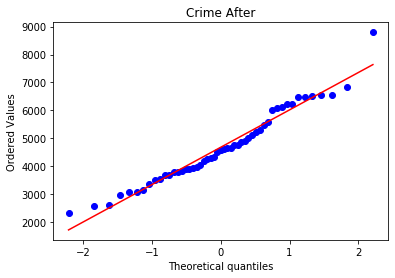

In [22]:
stats.probplot(df['Crime After'], plot=plt)
plt.title('Crime After');

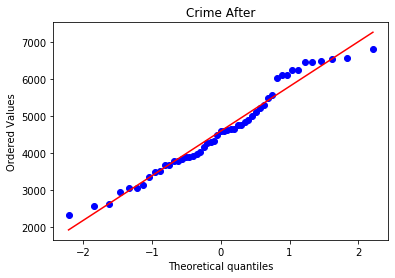

In [23]:
q3, q1 = np.percentile(df['Crime After'], [75,25])
iqr = q3 - q1
outlier = q3+1.5*iqr
outlier
average = df.loc[df['Crime After'] < outlier, 'Crime After'].mean()
df['Crime After'] = np.where(df['Crime After'] > outlier, average, df['Crime After'])
stats.probplot(df['Crime After'], plot=plt)
plt.title('Crime After');

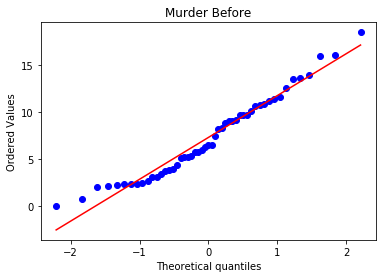

In [24]:
stats.probplot(df['Murder Before'], plot=plt)
plt.title('Murder Before');

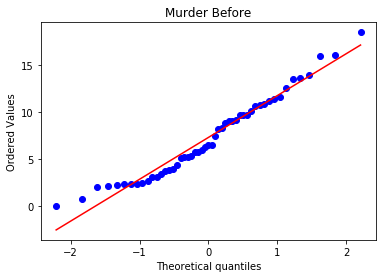

In [25]:
q3, q1 = np.percentile(df['Murder Before'], [75,25])
iqr = q3 - q1
outlier = q3+1.5*iqr
outlier
average = df.loc[df['Murder Before'] < outlier, 'Murder Before'].mean()
df['Murder Before'] = np.where(df['Murder Before'] > outlier, average, df['Murder Before'])
stats.probplot(df['Murder Before'], plot=plt)
plt.title('Murder Before');

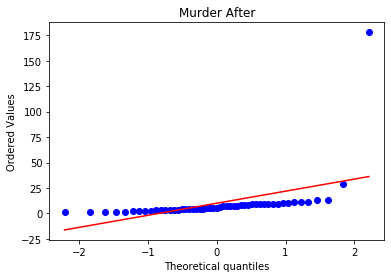

In [26]:
stats.probplot(df['Murder After'], plot=plt)
plt.title('Murder After');

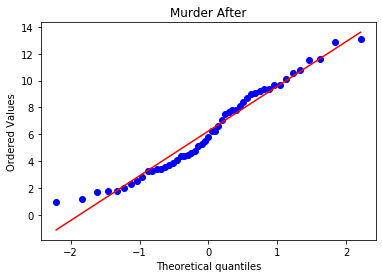

In [27]:
q3, q1 = np.percentile(df['Murder After'], [75,25])
iqr = q3 - q1
outlier = q3+1.5*iqr
outlier
average = df.loc[df['Murder After'] < outlier, 'Murder After'].mean()
df['Murder After'] = np.where(df['Murder After'] > outlier, average, df['Murder After'])
stats.probplot(df['Murder After'], plot=plt)
plt.title('Murder After');

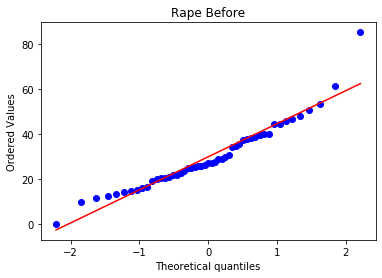

In [28]:
stats.probplot(df['Rape Before'], plot=plt)
plt.title('Rape Before');

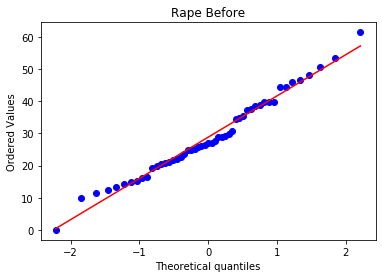

In [29]:
q3, q1 = np.percentile(df['Rape Before'], [75,25])
iqr = q3 - q1
outlier = q3+1.5*iqr
outlier
average = df.loc[df['Rape Before'] < outlier, 'Rape Before'].mean()
df['Rape Before'] = np.where(df['Rape Before'] > outlier, average, df['Rape Before'])
stats.probplot(df['Rape Before'], plot=plt)
plt.title('Rape Before');

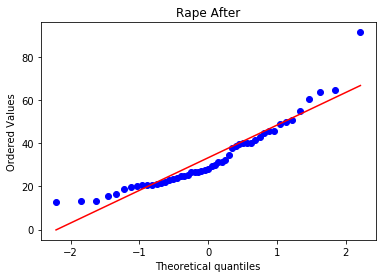

In [30]:
stats.probplot(df['Rape After'], plot=plt)
plt.title('Rape After');

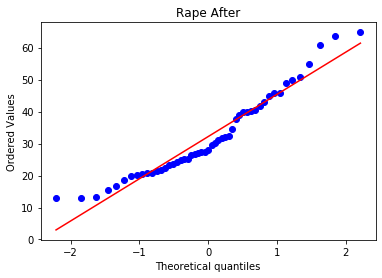

In [31]:
q3, q1 = np.percentile(df['Rape After'], [75,25])
iqr = q3 - q1
outlier = q3+1.5*iqr
outlier
average = df.loc[df['Rape After'] < outlier, 'Rape After'].mean()
df['Rape After'] = np.where(df['Rape After'] > outlier, average, df['Rape After'])
stats.probplot(df['Rape After'], plot=plt)
plt.title('Rape After');

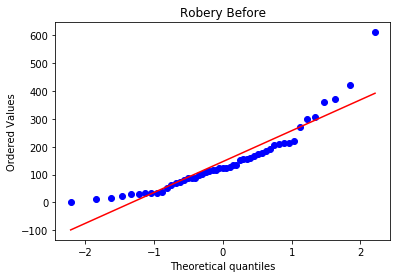

In [32]:
stats.probplot(df['Robery Before'], plot=plt)
plt.title('Robery Before');

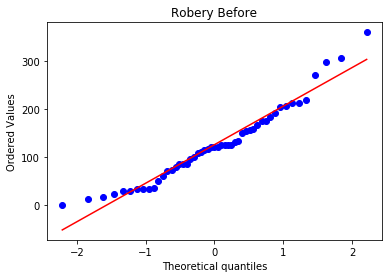

In [33]:
q3, q1 = np.percentile(df['Robery Before'], [75,25])
iqr = q3 - q1
outlier = q3+1.5*iqr
outlier
average = df.loc[df['Robery Before'] < outlier, 'Robery Before'].mean()
df['Robery Before'] = np.where(df['Robery Before'] > outlier, average, df['Robery Before'])
stats.probplot(df['Robery Before'], plot=plt)
plt.title('Robery Before');

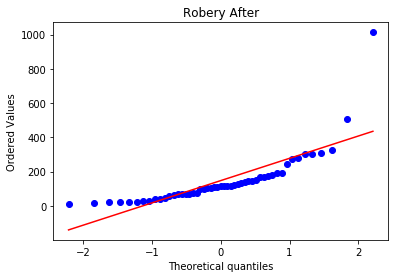

In [34]:
stats.probplot(df['Robery After'], plot=plt)
plt.title('Robery After');

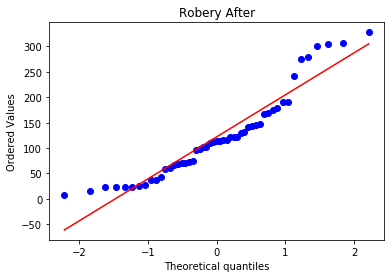

In [35]:
q3, q1 = np.percentile(df['Robery After'], [75,25])
iqr = q3 - q1
outlier = q3+1.5*iqr
outlier
average = df.loc[df['Robery After'] < outlier, 'Robery After'].mean()
df['Robery After'] = np.where(df['Robery After'] > outlier, average, df['Robery After'])
stats.probplot(df['Robery After'], plot=plt)
plt.title('Robery After');

In [36]:
# a)
val = stats.ttest_rel(df["Crime Before"], df["Crime After"])
alpha = 0.05

if val[0] < 0:
    pvalue = 1-val[1]/2
else:
    pvalue = val[1]*0.5
    
if pvalue < alpha:
    print("Reject since ", round(pvalue, 4), ' < ', alpha)
else:
    print("Fail to reject since ", round(pvalue, 4) , '\u2265' , alpha)


Reject since  0.0  <  0.05


In [37]:
val = stats.ttest_rel(df["Murder Before"], df["Murder After"])
alpha = 0.05

if val[0] < 0:
    pvalue = 1-val[1]/2
else:
    pvalue = val[1]*0.5
    
if pvalue < alpha:
    print("Reject since ", round(pvalue, 4), ' < ', alpha)
else:
    print("Fail to reject since ", round(pvalue, 4) , '\u2265' , alpha)

Reject since  0.0003  <  0.05


In [38]:
val = stats.ttest_rel(df["Rape Before"], df["Rape After"])
alpha = 0.05

if val[0] < 0:
    pvalue = 1-val[1]/2
else:
    pvalue = val[1]*0.5
    
if pvalue < alpha:
    print("Reject since ", round(pvalue, 4), ' < ', alpha)
else:
    print("Fail to reject since ", round(pvalue, 4) , '\u2265' , alpha)

Fail to reject since  0.9882 ≥ 0.05


In [39]:
val = stats.ttest_rel(df["Robery Before"], df["Robery After"])
alpha = 0.05

if val[0] < 0:
    pvalue = 1-val[1]/2
else:
    pvalue = val[1]*0.5
    
if pvalue < alpha:
    print("Reject since ", round(pvalue, 4), ' < ', alpha)
else:
    print("Fail to reject since ", round(pvalue, 4) , '\u2265' , alpha)

Fail to reject since  0.2571 ≥ 0.05


In [ ]:
# Very significant effect on overall crime and Murder. No significant effect on robery. And it seems that rape has gone up!

In [40]:
# b)
diff_crime = df["Crime Before"] - df["Crime After"]
diff_murder = df["Murder Before"] - df["Murder After"]
diff_rape = df["Rape Before"] - df["Rape After"]
diff_robery = df["Robery Before"] - df["Robery After"]

An 95.0 % upper confidence interval for the sample mean is 473.794 < μ 


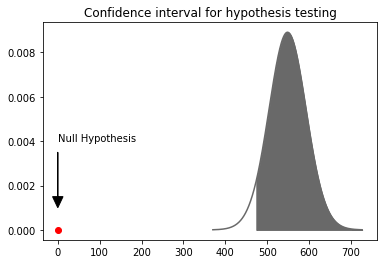

In [41]:

n = len(diff_crime)
mean = np.mean(diff_crime)
SE = stats.sem(diff_crime)
Level = 0.90

CI = stats.t.interval(Level, n-1, loc=mean, scale=SE)

print('An ' + repr(Level*100+5) + ' % upper confidence interval for the sample mean is '+ repr(round(CI[0],3)) + ' < \u03bc ')

x = np.linspace(mean-4*SE, mean+4*SE, 1000)

z = x[x >= CI[0]]
y = stats.t.pdf(x,n-1, mean, SE)
plt.plot(x,y, color = 'dimgrey')
plt.fill_between(z, stats.t.pdf(z,n-1, mean,SE), color = 'dimgrey')
plt.title('Confidence interval for hypothesis testing')
plt.plot(0, 0, 'ro')
plt.text(x=0, y=0.004, s= "Null Hypothesis", ha = 'left')
plt.arrow(0, 0.0035, 0, -0.002, head_width = 25, head_length = 0.0005, color='k')
plt.show()

An 95.0 % upper confidence interval for the sample mean is 0.575 < μ 


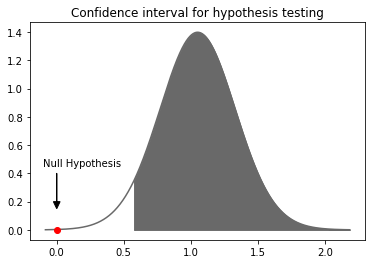

In [42]:
n = len(diff_murder)
mean = np.mean(diff_murder)
SE = stats.sem(diff_murder)
Level = 0.90

CI = stats.t.interval(Level, n-1, loc=mean, scale=SE)

print('An ' + repr(Level*100+5) + ' % upper confidence interval for the sample mean is '+ repr(round(CI[0],3)) + ' < \u03bc ')

x = np.linspace(mean-4*SE, mean+4*SE, 1000)

z = x[x >= CI[0]]
y = stats.t.pdf(x,n-1, mean, SE)
plt.plot(x,y, color = 'dimgrey')
plt.fill_between(z, stats.t.pdf(z,n-1, mean,SE), color = 'dimgrey')
plt.title('Confidence interval for hypothesis testing')
plt.plot(0, 0, 'ro')
plt.text(x=-0.1, y=0.45, s= "Null Hypothesis", ha = 'left')
plt.arrow(0, 0.4, 0, -0.2, head_width = 0.05, head_length = 0.05, color='k')
plt.show()

An 95.0 % upper confidence interval for the sample mean is -5.718 < μ 


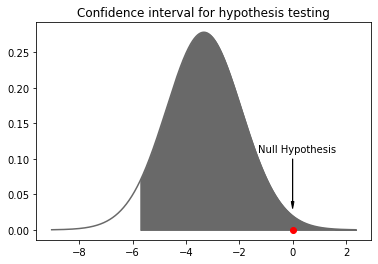

In [43]:
n = len(diff_rape)
mean = np.mean(diff_rape)
SE = stats.sem(diff_rape)
Level = 0.90

CI = stats.t.interval(Level, n-1, loc=mean, scale=SE)

print('An ' + repr(Level*100+5) + ' % upper confidence interval for the sample mean is '+ repr(round(CI[0],3)) + ' < \u03bc ')

x = np.linspace(mean-4*SE, mean+4*SE, 1000)

z = x[x >= CI[0]]
y = stats.t.pdf(x,n-1, mean, SE)
plt.plot(x,y, color = 'dimgrey')
plt.fill_between(z, stats.t.pdf(z,n-1, mean,SE), color = 'dimgrey')
plt.title('Confidence interval for hypothesis testing')
plt.plot(0, 0, 'ro')
plt.text(x=0.15, y=0.11, s= "Null Hypothesis", ha = 'center')
plt.arrow(0, 0.1, 0, -0.06, head_width = 0.1, head_length = 0.01, color='k')
plt.show()

An 95.0 % upper confidence interval for the sample mean is -6.884 < μ 


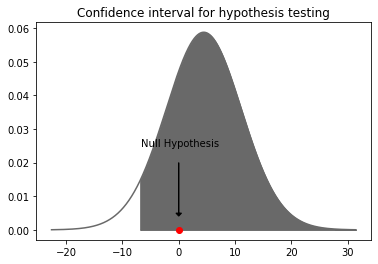

In [44]:
n = len(diff_robery)
mean = np.mean(diff_robery)
SE = stats.sem(diff_robery)
Level = 0.90

CI = stats.t.interval(Level, n-1, loc=mean, scale=SE)

print('An ' + repr(Level*100+5) + ' % upper confidence interval for the sample mean is '+ repr(round(CI[0],3)) + ' < \u03bc ')

x = np.linspace(mean-4*SE, mean+4*SE, 1000)

z = x[x >= CI[0]]
y = stats.t.pdf(x,n-1, mean, SE)
plt.plot(x,y, color = 'dimgrey')
plt.fill_between(z, stats.t.pdf(z,n-1, mean,SE), color = 'dimgrey')
plt.title('Confidence interval for hypothesis testing')
plt.plot(0, 0, 'ro')
plt.text(x=0.15, y=0.025, s= "Null Hypothesis", ha = 'center')
plt.arrow(0, 0.02, 0, -0.015, head_width = 1, head_length = 0.0009, color='k')
plt.show()

Assignment 6
==

In [4]:
df = pd.read_excel(
    'C:/Users/RIB/OneDrive - ViaUC/Arbejde/Stochastic modeling and processes/Previous Exams/Salary.xlsx'
)
df.head()

,YearsExperience,Salary
0,1.1,29343
1,1.3,36205
2,1.5,27731
3,2.0,33525
4,2.2,29891


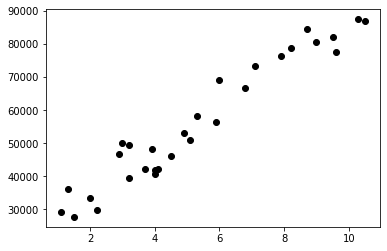

In [5]:
X = df['YearsExperience']
y = df['Salary']
plt.scatter(X, y,  color='black');

In [6]:
X1 = sm.add_constant(X)
model = sm.OLS(y, X1).fit()
res = model.resid
yhat = model.fittedvalues
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     412.4
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           2.72e-18
Time:                        14:20:57   Log-Likelihood:                -296.40
No. Observations:                  30   AIC:                             596.8
Df Residuals:                      28   BIC:                             599.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.162e+04   1921.463     11.254      0.000    1.77e+04    2.56e+04
YearsExperience  6501.7589    320.170     20.307      0.000    5845.921    7157.597
==============================================================================
Omnibus:                        4.321   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                2.044
Skew:                           0.330   Prob(JB):                        0.360
Kurtosis:                       1.905   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

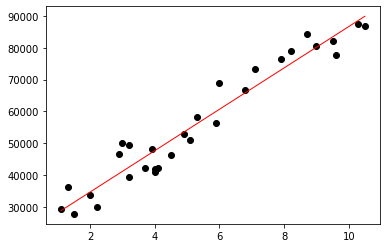

In [7]:
plt.scatter(X, y,  color='black')
plt.plot(X, yhat, color='red', linewidth=1);

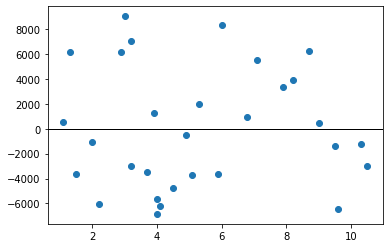

In [49]:
plt.scatter(X, res)
plt.axhline(y=0, color='k', linewidth=1)
plt.show()

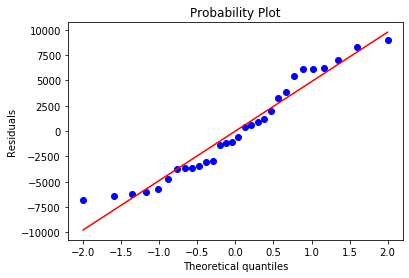

Skewness = 0.3305
Kurtosis = -1.0946


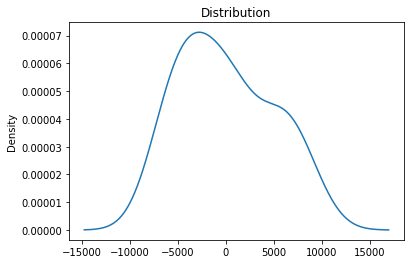

In [50]:
stats.probplot(res, plot=plt)
plt.ylabel('Residuals')
plt.show()
print('Skewness = ' + repr(round(stats.skew(res),4)))
print('Kurtosis = ' + repr(round(stats.kurtosis(res),4)))
df = pd.DataFrame(res)
fig, ax = plt.subplots()
df.plot.kde(ax=ax, legend=False, title='Distribution');

In [8]:
# b)
[b0, b1] = model.params
print('A newly employed developer can expect a monthly wage of kr.', round(b0+0*b1, 2))

A newly employed developer can expect a monthly wage of kr. 21623.65


In [9]:
# c)
print('If a software developer retires after 40 years, he or she will have a wage of kr.',
      round(b0+40*b1, 2))

If a software developer retires after 40 years, he or she will have a wage of kr. 281694.01


In [ ]:
# This sounds very unlikely!